# Delivery_time -> Predict delivery time using sorting time 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
delvry=pd.read_csv('../Anu_Python/Practice/delivery_time.csv')

In [15]:
delvry

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
delvry=delvry.rename({'Delivery Time':'Delivery_time',
                      'Sorting Time':'Sorting_time'},
                     axis=1)
delvry

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [27]:
delvry.isnull().sum()

Delivery_time    0
Sorting_time     0
dtype: int64

In [5]:
delvry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_time  21 non-null     float64
 1   Sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Sorting_time', ylabel='Delivery_time'>

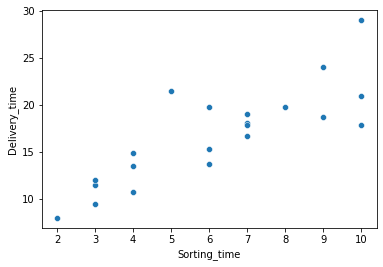

In [9]:
sns.scatterplot(x=delvry['Sorting_time'],y=delvry['Delivery_time'])

In [10]:
delvry.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


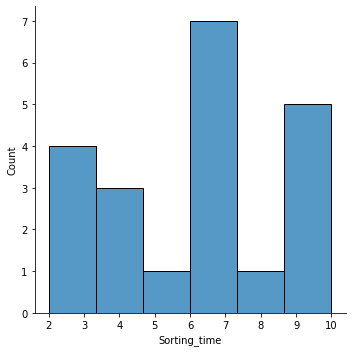

In [11]:
sns.displot(delvry['Sorting_time'])

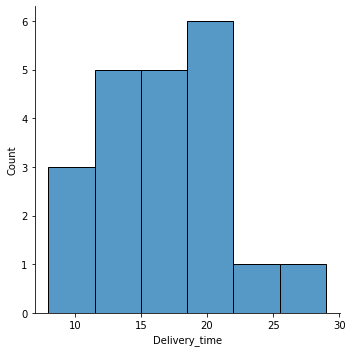

In [12]:
sns.displot(delvry['Delivery_time'])

In [13]:
import statsmodels.formula.api as smf
model=smf.ols('Delivery_time~Sorting_time',data=delvry).fit()

<AxesSubplot:xlabel='Sorting_time', ylabel='Delivery_time'>

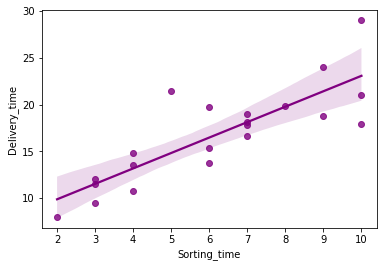

In [18]:
sns.regplot(x="Sorting_time",y="Delivery_time",data=delvry,color='purple')

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 10 May 2023   Prob (F-statistic):           3.98e-06
Time:                        05:31:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [21]:
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [24]:
newdata=pd.Series([4,9])
newdata

0    4
1    9
dtype: int64

In [25]:
delivery_pred=pd.DataFrame(newdata,columns=['Sorting_time'])
delivery_pred

,Sorting_time
0,4
1,9


In [26]:
model.predict(delivery_pred)

0    13.178814
1    21.423913
dtype: float64